In [18]:
# 📊 Analyze a single well's "on-time status" vs time from the BLE log file

import matplotlib.pyplot as plt
import numpy as np

In [19]:
def plot_well_on_times_in_minutes(file_path, well_name, bin_size=600):
    # Control wells as defined in the script
    ctrl_wells = [
        'A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11',
        'H9',  'G9',  'F9',  'E9',  'D9',  'C9',  'B9',  'A9'
    ]

    if well_name not in ctrl_wells:
        raise ValueError(f"Well {well_name} not in control wells list.")
    well_index = ctrl_wells.index(well_name)

    timestamps = []
    on_flags = []

    with open(file_path, 'r') as file:
        lines = file.readlines()

    for i in range(0, len(lines), 2):
        try:
            timestamp_str = lines[i].split(':')[0].strip()
            timestamp = float(timestamp_str)
            control_str = lines[i].split('Writing')[-1].strip()

            well_char = control_str[well_index]
            is_on = 1 if well_char == 'g' else 0

            timestamps.append(timestamp)
            on_flags.append(is_on)
        except Exception as e:
            continue

    # Convert to numpy arrays
    timestamps = np.array(timestamps)
    on_flags = np.array(on_flags)

    # Bin the data
    max_time = timestamps[-1]
    bins = np.arange(0, max_time + bin_size, bin_size)
    bin_centers = (bins[:-1] + bins[1:]) / 2 / 60  # convert to minutes

    on_times = []
    for start, end in zip(bins[:-1], bins[1:]):
        mask = (timestamps >= start) & (timestamps < end)
        on_time = np.sum(on_flags[mask]) * 0.5 / 60  # convert to minutes
        on_times.append(on_time)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.bar(bin_centers, on_times, width=bin_size/60, align='center', alpha=0.7)
    plt.xlabel('Time (minutes)')
    plt.ylabel('On-time duration (minutes)')
    plt.title(f'On-time durations for well {well_name} in {bin_size/60}-minute bins')
    plt.grid(True)
    plt.show()

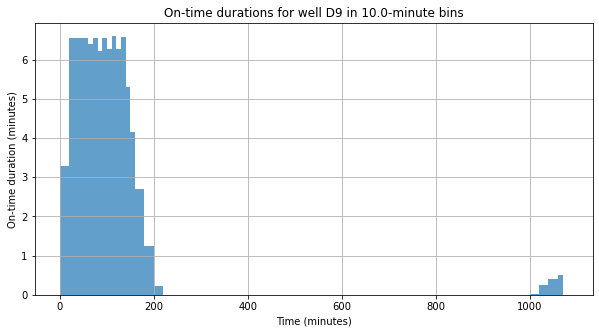

In [27]:
# Example usage
# Provide the full path to your .out file
file_path = 'test_040625_bltout.out'
well_name = 'D9'  # Change as needed
plot_well_on_times_in_minutes(file_path, well_name, bin_size = 600)